1.   Name : Sachin Yadav
2.   Email Id: sachinrao10397@gmail.com
3.   Contact No : 9667957762

### Project: Train a model on fashion images and genenerate the AI based description.

### In this project I have used a ResNet50 model to generate prediction array of the image and make a model in which model_1 is taking description of image from the dataset in count of words technique and model_2 is giving prediction array of Resnet model and give them to LSTM main model. 

#### Got a 71% accuracy.



In [1]:
## Import all important libraries
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications import ResNet50, imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, BatchNormalization, Input, \
                                    LSTM, Embedding, Input, TimeDistributed, Bidirectional, Activation, RepeatVector, Concatenate
from keras.preprocessing.sequence import pad_sequences


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os

In [2]:
## Link a colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/catalogue\ assignment

/content/drive/MyDrive/catalogue assignment


In [4]:
pwd

'/content/drive/MyDrive/catalogue assignment'

In [5]:
## Read the file
df = pd.read_excel('dataset.xlsx')
df.head()

,Title,Description,Material,Pattern,Neckline,Image_Path,Image_Path.1,Unnamed: 7
0,Peach Poly Crepe jumpsuit,This stylish foil print kurta from janasya is ...,Crepe,Printed,Round Neck,/images/pic_0.jpg,/images/pic_0.jpg,pic_0.jpg
1,Light Brown Bias Yoke Checks Top,This check pattern top by Work Label is crafte...,Cotton,Checks,Round Neck,/images/pic_1.jpg,/images/pic_1.jpg,pic_1.jpg
2,Off White Geometric Straight Cotton Dobby Top ...,"Featuring elegant printed details, this off wh...",Viscose,Checks,Round Neck,/images/pic_2.jpg,/images/pic_2.jpg,NaN
3,Blue Me Away Cape Top,Add an extra dose of style to your casual ward...,Polyester,Solid/Plain,V-Neck,/images/pic_3.jpg,/images/pic_3.jpg,NaN
4,Yellow On A High Gown,Yellow polyester georgette maxi dress. Polyest...,Polyester,Solid/Plain,V-Neck,/images/pic_4.jpg,/images/pic_4.jpg,NaN


In [6]:
## Store the image path and description in list 
path = list(df['Image_Path'])
Iamge_Description = list(df["Description"])

### Image Preprocessing

In [7]:
## Edit the image path 
imagePath = []
for i in path:
  ip = "." + i
  imagePath.append(ip)

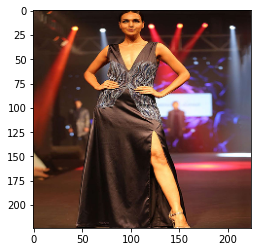

In [8]:
img = cv2.imread('./images/pic_82.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
plt.imshow(img)

In [9]:
## Call ResNet model
ResNet = ResNet50(include_top=True)

102973440/102967424 [==============================] - 4s 0us/step


In [10]:
## Apply ResNet model on all images
last = ResNet.layers[-2].output
modell = Model(inputs = ResNet.input,outputs = last)
modell.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
## Lets predict using ResNet model and add it in a dictionary
images_features = {}
count = 0
for i in imagePath:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modell.predict(img).reshape(2048,)
        
    # img_name = i.split('/')[-1]
    
    images_features[i] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500


In [36]:
 ## Values stored in image features dictionary
 images_features['./images/pic_82.jpg']

array([1.6811163 , 2.175395  , 0.06980729, ..., 0.03872671, 1.4715201 ,
       0.19152299], dtype=float32)

### Text Preprocessing

In [12]:
# Add Imagepath and Description in one dictionary i.e., Key as Image path and values as description
dataa = {}
for i, j in zip(imagePath, Iamge_Description):
  dataa[i] = j

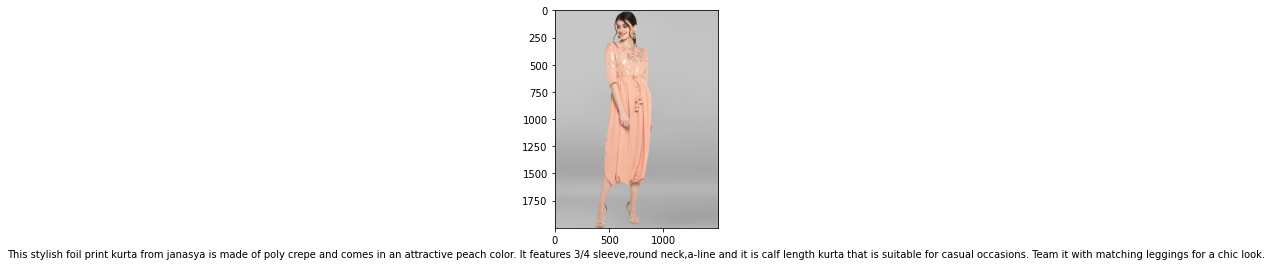

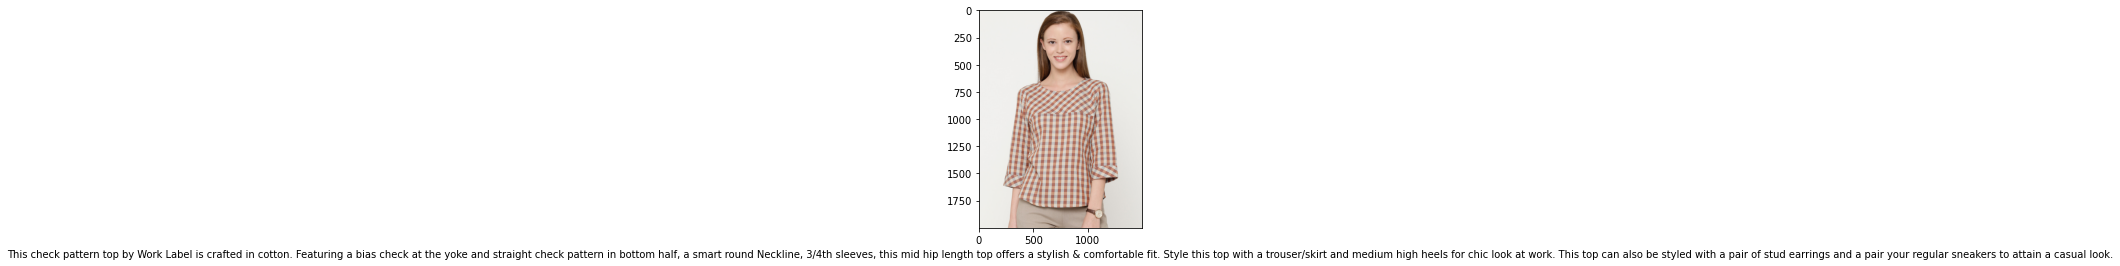

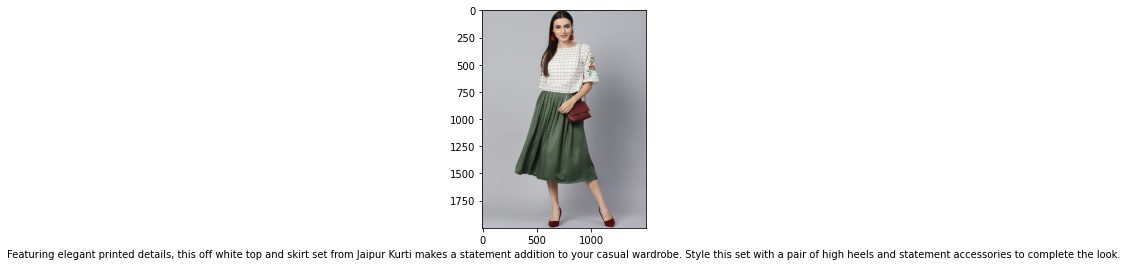

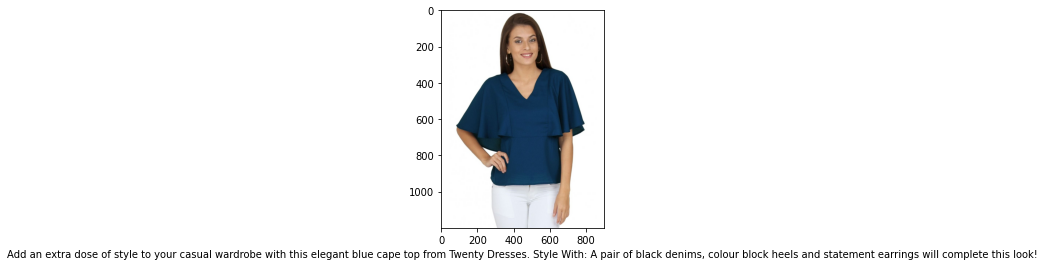

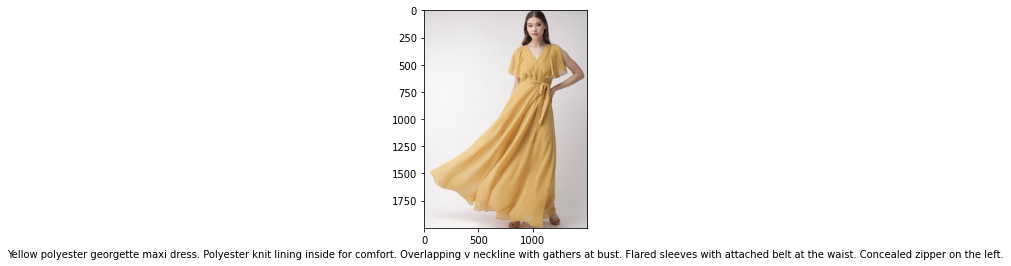

In [211]:
for i in range(5):
  plt.figure()
  img_name = imagePath[i]
  
  
  img = cv2.imread(img_name)
  
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.xlabel(dataa[img_name])
  plt.imshow(img)


In [13]:
## Preprocess the description
def preprocessed(txt):
    modified = txt.lower()
    ## Add start and end element in description
    modified = 'startofseq ' + modified + ' endofseq'   
    return modified

In [14]:
## Apply the preprocessing on our dict
for k,v in dataa.items():
      dataa[k] = preprocessed(v)

In [15]:
## After preprocessing
dataa['./images/pic_199.jpg']

'startofseq olive polyester crepe dress. wrap style v neckline with three fourth sleeves. button detail on the left thigh. elasticated waist with an attached tie up belt. ruching on the sleeve sides with tie up detailing. fit and flare silhouette. endofseq'

### Create Vocabulary

In [16]:
## Create a Vocabulary or Vocabulary of dictionary
count_words = {}
for k,v in dataa.items():
  
  for word in v.split():
    if word not in count_words:

      count_words[word] = 0

    else:
      count_words[word] += 1

In [17]:
## total number of style word present in our description
count_words['style']

231

In [38]:
## Total words present
len(count_words)

1939

In [18]:
## concert a caption dict in the interger words i.e., machine understandable form
## Key as imagePath and description converted to integers
for k, v in dataa.items():
   
  encoded = []
  for word in v.split():  
    encoded.append(count_words[word])

  dataa[k] = encoded

In [129]:
### decription in integer format
dataa['./images/pic_199.jpg']

[499,
 5,
 119,
 45,
 46,
 23,
 231,
 40,
 59,
 713,
 14,
 12,
 34,
 44,
 19,
 136,
 472,
 14,
 0,
 24,
 56,
 713,
 80,
 8,
 26,
 48,
 4,
 6,
 136,
 472,
 15,
 5,
 713,
 26,
 48,
 9,
 54,
 921,
 34,
 40,
 499]

### Built Generator Function

**Splitting each word and setting next word to repredicted as our output.**



In [19]:
max_len = 0
for k, v in dataa.items():

  if len(v) > max_len:
    max_len = len(v)
    print(v)

[499, 562, 18, 2, 28, 7, 166, 1, 238, 25, 200, 1, 45, 921, 18, 226, 80, 1, 7, 2, 175, 128, 2, 0, 0, 921, 175, 238, 0, 14, 7, 45, 238, 1, 308, 61, 5, 35, 175, 713, 6, 4, 308, 876, 32, 167, 499]
[499, 562, 7, 6, 197, 114, 13, 5, 238, 126, 226, 0, 40, 876, 1, 7, 137, 472, 12, 921, 29, 7, 6, 226, 14, 0, 876, 7, 46, 12, 29, 56, 562, 1, 3, 14, 197, 0, 876, 18, 44, 13, 66, 231, 562, 197, 713, 876, 0, 921, 0, 80, 151, 308, 32, 37, 137, 0, 562, 197, 21, 4, 39, 4, 713, 876, 183, 200, 4, 29, 921, 876, 183, 126, 77, 19, 326, 3, 876, 61, 167, 499]
[499, 66, 64, 76, 5, 46, 26, 48, 59, 19, 713, 876, 11, 3, 30, 10, 137, 472, 69, 12, 921, 44, 13, 69, 63, 308, 51, 921, 53, 5, 1, 137, 472, 11, 308, 45, 64, 23, 10, 20, 69, 713, 876, 5, 2, 308, 472, 5, 126, 2, 23, 238, 3, 226, 308, 876, 3, 19, 45, 238, 876, 3, 200, 9, 16, 44, 45, 10, 36, 28, 151, 876, 12, 24, 921, 7, 16, 57, 9, 49, 7, 7, 226, 2, 1, 499]
[499, 562, 66, 64, 76, 214, 114, 2, 238, 126, 226, 45, 921, 128, 876, 22, 66, 0, 59, 12, 52, 0, 118, 166

In [21]:
## Maximum length array
max_len

88

In [20]:
## Generate a X, y_in and y_out taking photo dict(i.e., contain ResNet prediction) and caption dict(i.e., contain description in integer)
VOCAB_SIZE = len(count_words)

def generator(photo, caption):
    
  X = []
  y_in = []
  y_out = []
  
  for k, v in caption.items():
    
    for i in range(1, len(v)):
      X.append(photo[k])         ## Appending image featurees to X var

      in_seq= [v[:i]]            ## splitting the description in a sequence i.e., 0-1, 0-1-2, 0-1-2-3, ........... 
      out_seq = v[i]             ## Next word

      ## use pad sequence to convert the variable length to max_len i.e., 88
      in_seq = pad_sequences(in_seq, maxlen=max_len, padding='post', truncating='post')[0]
      out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

      y_in.append(in_seq)
      y_out.append(out_seq)
          
  return X, y_in, y_out

In [22]:
## run the generator func and add values in Variables
X, y_in, y_out = generator(images_features, dataa)

In [23]:
## length of all variables
len(X), len(y_in), len(y_out)

(18526, 18526, 18526)

In [24]:
## convert them  in array
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [25]:
## shapes
X.shape, y_in.shape, y_out.shape

((18526, 2048), (18526, 88), (18526, 1939))

In [26]:
## Built a model
embedding_size = 128
max_len = max_len
vocab_size = len(count_words)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 88, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 88, 128)           248192    
_________________________________________________________________
lstm (LSTM)                  (None, 88, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 88, 128)           32896     
Total params: 675,328
Traina

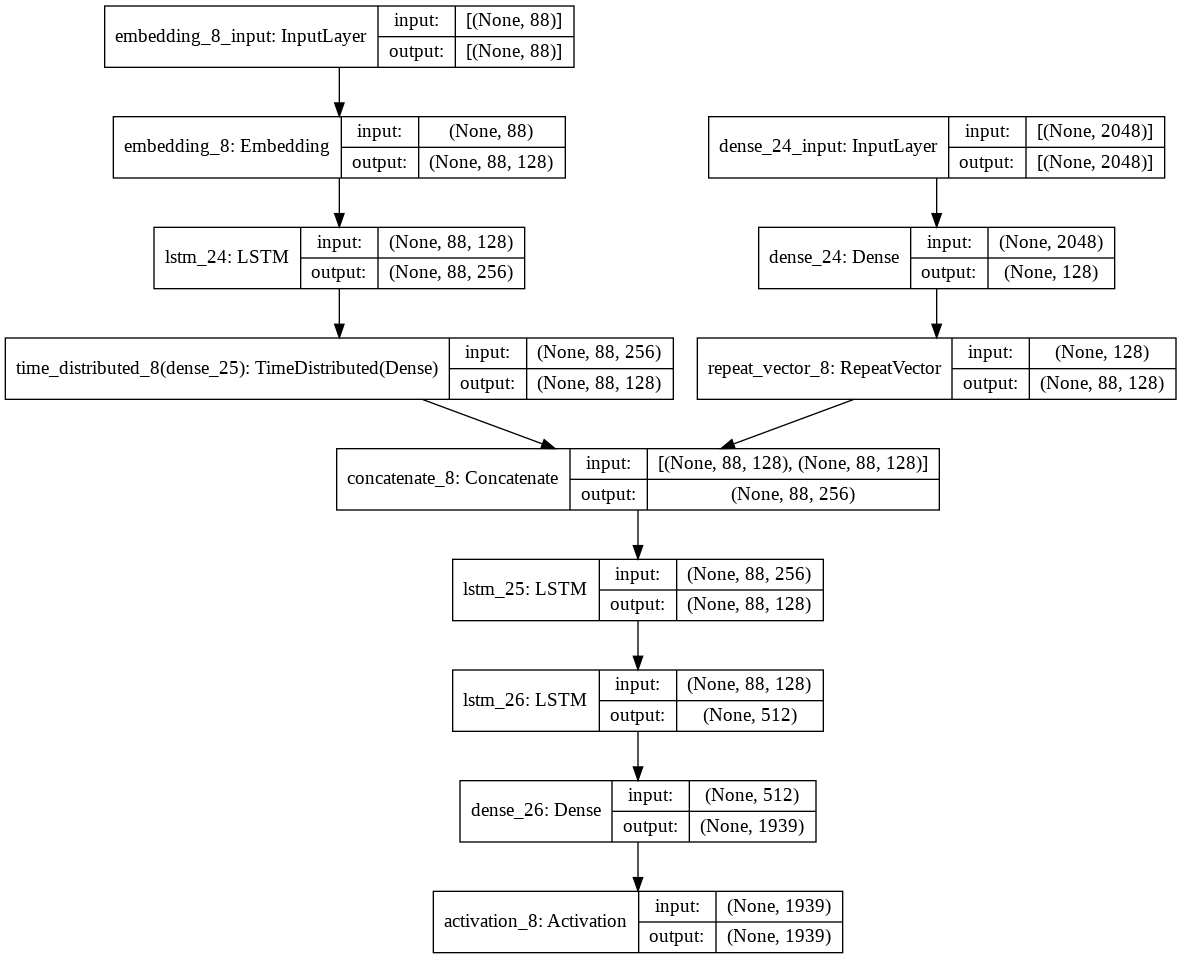

In [231]:
## plot the model
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [39]:
## fit the model
model.fit([X, y_in], y_out, batch_size=512, epochs=100)

Epoch 1/100
37/37 [==============================] - 5s 122ms/step - loss: 1.4714 - accuracy: 0.4606
Epoch 2/100
37/37 [==============================] - 5s 122ms/step - loss: 1.4515 - accuracy: 0.4631
Epoch 3/100
37/37 [==============================] - 5s 122ms/step - loss: 1.4225 - accuracy: 0.4693
Epoch 4/100
37/37 [==============================] - 5s 122ms/step - loss: 1.4209 - accuracy: 0.4718
Epoch 5/100
37/37 [==============================] - 5s 122ms/step - loss: 1.3986 - accuracy: 0.4790
Epoch 6/100
37/37 [==============================] - 5s 122ms/step - loss: 1.4113 - accuracy: 0.4777
Epoch 7/100
37/37 [==============================] - 5s 122ms/step - loss: 1.3611 - accuracy: 0.4937
Epoch 8/100
37/37 [==============================] - 5s 122ms/step - loss: 1.3763 - accuracy: 0.4870
Epoch 9/100
37/37 [==============================] - 5s 122ms/step - loss: 1.3655 - accuracy: 0.4924
Epoch 10/100
37/37 [==============================] - 5s 122ms/step - loss: 1.3272 - accura

In [40]:
## Inverse the dictionary
inv_dict = {v:k for k, v in count_words.items()}

In [45]:
## save the model
model.save('image_desc.h5')

### Predictions

In [69]:
## function to convert the image in machine readable format
def getImage(x):
  
  # test_img_path = imagePath[x]

  test_img = cv2.imread(x)
  test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

  test_img = cv2.resize(test_img, (224,224))

  test_img = np.reshape(test_img, (1,224,224,3))
  
  return test_img

In [70]:
test_feature = modell.predict(getImage('newimg2.jpg')).reshape(1,2048)

In [71]:
text_inp = ['startofseq']

count = 0
desc = ''
while count < 25:
  count += 1

  encoded = []
  for i in text_inp:
    encoded.append(count_words[i])

  encoded = [encoded]

  encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=max_len)


  prediction = np.argmax(model.predict([test_feature, encoded]))             ## Returns a highest prob word
 
  sampled_word = inv_dict[prediction]

  desc = desc + ' ' + sampled_word
      
  if sampled_word == 'endofseq':
    break

  text_inp.append(sampled_word)

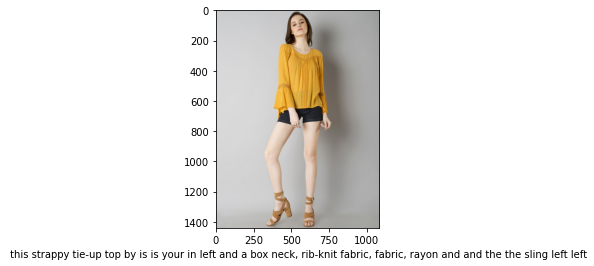

In [73]:
imag = cv2.imread('newimg2.jpg')
imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
plt.imshow(imag)
plt.xlabel(desc);

### Predict the decription of dataset images

In [ ]:
## function to convert the image in machine readable format
def getImage(x):
  
  test_img_path = imagePath[x]

  test_img = cv2.imread(test_img_path)
  test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

  test_img = cv2.resize(test_img, (224,224))

  test_img = np.reshape(test_img, (1,224,224,3))
  
  return test_img

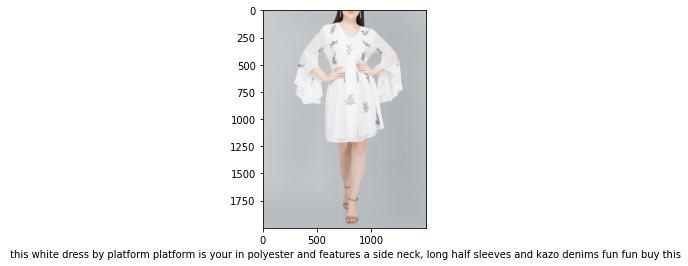

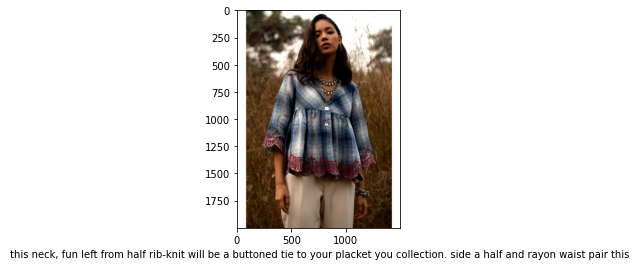

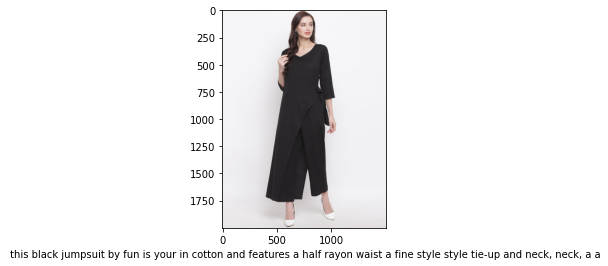

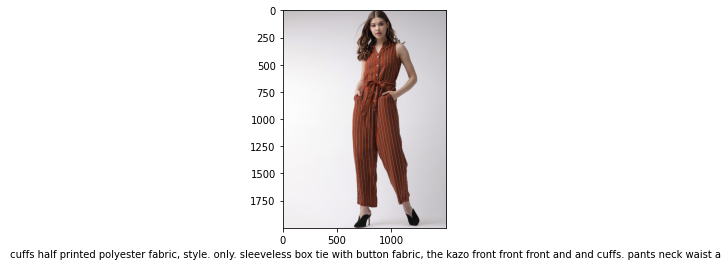

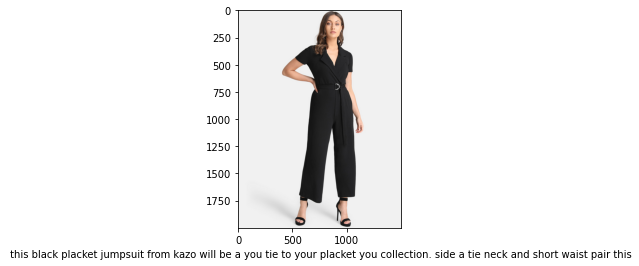

In [44]:
for i in range(5):
  
  no = np.random.randint(100,500,(1,1))[0,0]
  test_feature = modell.predict(getImage(no)).reshape(1,2048)
  
  test_img_path = imagePath[no]
  test_img = cv2.imread(test_img_path)
  test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


  text_inp = ['startofseq']

  count = 0
  desc = ''
  while count < 25:
    count += 1

    encoded = []
    for i in text_inp:
      encoded.append(count_words[i])

    encoded = [encoded]

    encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=max_len)


    prediction = np.argmax(model.predict([test_feature, encoded]))

    sampled_word = inv_dict[prediction]

    desc = desc + ' ' + sampled_word
        
    if sampled_word == 'endofseq':
      break

    text_inp.append(sampled_word)
      
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(desc)